# Statistics: The Science of Decisions 


## Investigation of the Stroop Effect

## * Author : Sagarnil Das *

## Background Information on Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [28]:
# Library imports for python
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

## 1. What is our independent variable? What is our dependent variable?

In this specific experiment, our independent variable is whether the condition of the experiment is congruent or incongruent. Our dependent variable is time. Basically we are trying to see if the dependent variable i.e time, changes with the change in experiment condition i.e the experiment being congruent or incongruent.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

As null hypothesis generally suggests that there is no change of the dependent variable with change in the independent variable, a good null hypothesis(H<sub>0</sub>) in this case would be that there is no change in time for the two conditions. Our alternative hypothesis(H<sub>A</sub>) would be that the condition of the experiment would affect the time taken. But maybe there's a better way to define the hypothesis because from past experience, I have seen that the time taken for incongruent condition is generally more than the time taken for the congruent condition. So let's redefine our null hypothesis and alternative hypothesis. We are guessing that the task times in incongruent conditions will be more than the task times in congruent conditions. So this would be an one tailed test with the following hypothesis:


H<sub>0</sub> : μ<sub>incongruent</sub> ≤ μ<sub>congruent</sub> (** Null Hypothesis: ** Saying the color name when it is different from the text is easier than (or just as easy as) saying it when the text matches the color.)

H<sub>A</sub> : μ<sub>incongruent</sub> > μ<sub>congruent</sub> (** Alternative Hypothesis: ** Saying the color name when it is different from the text is harder than saying it when the text matches with the color.)

Now for this experiement, we cannot just comapare the two sample means for the task time and then if the incongruent one is greater than the congruent one, conclude that our Alternative Hypothesis is true. This is because this sample does not represent a whole population and this might be due to the fact that the people in this sample are smarter or dumber depending on our viewpoint which task is more difficult. So as we don't have any population parameters present in this dataset and the sample size is less than 30, the most appropriate statistical test for our experiment would be a ** one tailed t-test **. In our sample, as the same subjects took the tests at different times, we have a longitudinal design with dependent samples. We can compare the two averages of our dependent samples with a ** one tailed t-test. **

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [29]:
stroop_data = pd.read_csv('stroopdata.csv')

print("Sample Means")
print(stroop_data.mean(axis = 0))
print("\n")
print("Sample Standard Deviations")
print(stroop_data.std(axis = 0))

Sample Means
Congruent      14.051125
Incongruent    22.015917
dtype: float64


Sample Standard Deviations
Congruent      3.559358
Incongruent    4.797057
dtype: float64


So we notice that in Incongruent conditions, both the sample mean and standard deviations are higher than that of the congruent conditions.

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Let us plot the distribution of both congruent and incongruent sample data.

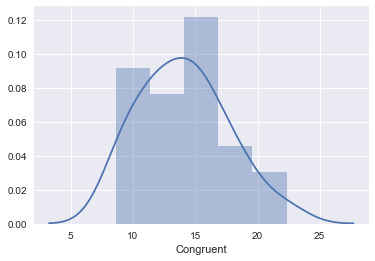

In [30]:
sns.distplot(stroop_data['Congruent'])

We see from the plot that the congruent data are pretty much normally distributed with the mean around 14.

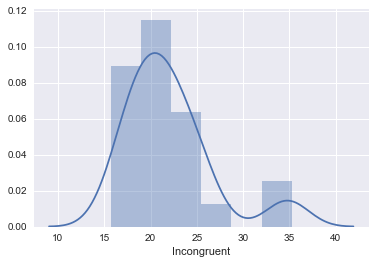

In [31]:
sns.distplot(stroop_data['Incongruent'])

There are a few datapoints which skew the distribution a little bit to the right. But other than that, this is also pretty much normally distributed as we expect it to be.

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

First let us see the sample sizes.

In [32]:
print("Congruent Sample Size: " + str(stroop_data['Congruent'].size))
print("Incongruent Sample Size: " + str(stroop_data['Incongruent'].size))

Congruent Sample Size: 24
Incongruent Sample Size: 24


So we see that both the samples are of equal size and so we don't have to do additional scaling for the statistical metrices. We also find out from the sample sizes that our Degrees of Freedom will be 23. Now let us find the standard deviation of the differences of conditions.

In [33]:
stroop_data['difference'] = stroop_data['Congruent'] - stroop_data['Incongruent']
print("Standard deviation of the differences: " + str(stroop_data['difference'].std(axis=0)))

Standard deviation of the differences: 4.86482691036


So now let's calculate the standard error. 
We know ** Standard Error = standard deviation of differences/square root of sample size **

In [34]:
se = stroop_data['difference'].std(axis=0)/math.sqrt(stroop_data['Incongruent'].size)
print ("Standard Error: " + str(se))

Standard Error: 0.993028634778


And we also see that point estimate for the difference of the means which we calculated before is: 22.02 - 14.05 = 7.97. So now we can find our t-statistics. We know that ** t-statistic = point estimate for the difference of the means/Standard Error **

In [35]:
t_stat = 7.97/se
print ("t-statistic: " + str(t_stat))

t-statistic: 8.02595184154


Now let's calculate our t-critical value at ** 23 Degrees of Freedom ** and at an ** alpha level of 0.05 or 95% Confidence Interval**.

In [36]:
t_critical = t.ppf(.95, 23)
print("t-critical: " + str(t_critical))

t-critical: 1.71387152775


So we see that the value of our ** t-statistic ** is much much higher than the ** t-critical ** value. So we can safely reject the Null Hypothesis and conclude that it takes much more time to do the incongruent task than the congruent one hence proving our Alternative Hypothesis. So our assumption that the task time for incongruent conditions is more than that of the congruent ones is indeed true at ** p < 0.05 **. From calculating the p value from graphpad.com, we see that p = 0.0001 when t = 8.0259 and Degrees of Freedom = 23.

## 6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


What our observations reveal in my opinion is that our brain cannot help but read. As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer.

One alternative or similar task I can think of to achieve similar results would be our perceptual responses towards paintings or drawings. It would be interesting to study how our brains associate these types of images from a perceptual viewpoint i.e color, shape, size etc and would our brain react differently if it is overloaded similarly by cut of information or in other words, adding surreal elements inside the painting which cuts us off from the real world elements we are used to. I would really love to conduct that experiment!

## Conclusion

So to conclude this project, let's recap. We did a one tailed t-test on dependent samples with longitudinal designs. We found out that there is statistically significant difference in the time taken to recite a set of colors under congruent and incongruent conditions, the incongruent task time being longer on average. By performing the same test on a more broader class images, we can potentially enhance our understanding of the elements and implications of the ** Stroop Effect **.